# Part 3: Analysis and Test Cases

In [7]:
import math
import random

# Constants representing the empty cell and player symbols
EMPTY = ' '
PLAYER_X = 'X'
PLAYER_O = 'O'

# Function to create an empty board of the specified size
def create_board(size):
    """
    Parameters:
        size (int): The size of the board (size x size).
        
    Returns:
        list: A 2D list representing the empty board.
    """
    # List comprehension that generates a size x size 2D list filled with EMPTY.
    return [[EMPTY for _ in range(size)] for _ in range(size)]

# Function to print the board in a readable format
def print_board(board):
    """
    Parameters:
        board (list): The current state of the board.
    """
    size = len(board)

    # Iterate over each row in the board to print it along with a separator line if not the last row.
    for i in range(size):
        print("|".join(board[i]))
        if i < size - 1:
            print("-" * (size * 2 - 1))

# Function to check if a move is valid (within the board bounds and on an empty cell)
def is_valid_move(board, row, col):
    """    
    Args:
        board (list): The game board.
        row (int): The row index for the move.
        col (int): The column index for the move.
        
    Returns:
        bool: True if the move is valid, False otherwise.
    """
    size = len(board)

    # Checks if the specified cell is within the bounds of the board and is empty.
    return 0 <= row < size and 0 <= col < size and board[row][col] == EMPTY

# Function to check if the board is completely filled
def is_board_full(board):
    """
    Parameters:
        board (list): The current state of the board.
        
    Returns:
        bool: True if the board is full, False otherwise.
    """
    size = len(board)
    for row in range(size):
        for col in range(size):
            if board[row][col] == EMPTY:
                return False
    return True

# Function to check if a player has won the game
def has_won(board, player):
    """
    Parameters:
        board (list): The current state of the board.
        player (str): The player symbol ('X' or 'O').
        
    Returns:
        bool: True if the player has won, False otherwise.
    """

    size = len(board)
    # Check rows for a win
    for row in range(size):
        if all(board[row][col] == player for col in range(size)):
            return True

    # Check columns for a win
    for col in range(size):
        if all(board[row][col] == player for row in range(size)):
            return True

    # Check main diagonal for a win
    if all(board[i][i] == player for i in range(size)):
        return True

    # Check anti-diagonal for a win
    if all(board[i][size - 1 - i] == player for i in range(size)):
        return True
    return False

# Function to evaluate the board state and assign a score to it
def evaluate_board(board, player, last_move):

    """
    Parameters:
       board (list): The current state of the board.
       player (str): The player symbol ('X' or 'O').
       last_move (tuple): The last move made on the board (row, col).
   
    Returns:
       int: The score assigned to the board state.
   
    This function evaluates the board state based on the number of player and opponent symbols in rows, columns, and diagonals.
    It assigns scores to potential winning lines and uses heuristics to prioritize certain configurations
    """
    
    size = len(board)
    opponent = PLAYER_O if player == PLAYER_X else PLAYER_X

    # Check if the player or opponent has won and return a high positive or negative score respectively.  
    if has_won(board, player):
        return size * size
    elif has_won(board, opponent):
        return -size * size
    else:
        player_score = 0
        opponent_score = 0
        
        # Evaluate rows and assign scores based on the number of player and opponent symbols
        for row in range(size):
            player_count = sum(1 for col in range(size) if board[row][col] == player)
            opponent_count = sum(1 for col in range(size) if board[row][col] == opponent)
            empty_count = sum(1 for col in range(size) if board[row][col] == EMPTY)
            if empty_count > 0:
                if player_count == size - 1:
                    player_score += 10
                elif opponent_count == size - 1:
                    opponent_score += 10
                elif player_count == size - 2:
                    player_score += 5
                elif opponent_count == size - 2:
                    opponent_score += 5
        
        # Evaluate columns and assign scores based on the number of player and opponent symbols
        for col in range(size):
            player_count = sum(1 for row in range(size) if board[row][col] == player)
            opponent_count = sum(1 for row in range(size) if board[row][col] == opponent)
            empty_count = sum(1 for row in range(size) if board[row][col] == EMPTY)
            if empty_count > 0:
                if player_count == size - 1:
                    player_score += 10
                elif opponent_count == size - 1:
                    opponent_score += 10
                elif player_count == size - 2:
                    player_score += 5
                elif opponent_count == size - 2:
                    opponent_score += 5
        
        # Evaluate main diagonal and assign scores based on the number of player and opponent symbols
        player_count = sum(1 for i in range(size) if board[i][i] == player)
        opponent_count = sum(1 for i in range(size) if board[i][i] == opponent)
        empty_count = sum(1 for i in range(size) if board[i][i] == EMPTY)
        if empty_count > 0:
            if player_count == size - 1:
                player_score += 10
            elif opponent_count == size - 1:
                opponent_score += 10
            elif player_count == size - 2:
                player_score += 5
            elif opponent_count == size - 2:
                opponent_score += 5
        
        # Evaluate anti-diagonal and assign scores based on the number of player and opponent symbols
        player_count = sum(1 for i in range(size) if board[i][size-1-i] == player)
        opponent_count = sum(1 for i in range(size) if board[i][size-1-i] == opponent)
        empty_count = sum(1 for i in range(size) if board[i][size-1-i] == EMPTY)
        if empty_count > 0:
            if player_count == size - 1:
                player_score += 10
            elif opponent_count == size - 1:
                opponent_score += 10
            elif player_count == size - 2:
                player_score += 5
            elif opponent_count == size - 2:
                opponent_score += 5
        
        return player_score - opponent_score

# Minimax function with Alpha-Beta Pruning
def minimax_with_depth(board, depth, alpha, beta, maximizing_player, player, last_move, depth_limit):
    """
    Minimax algorithm with Alpha-Beta pruning.

    Parameters:
        board (list): The current state of the board.
        depth (int): The current depth in the game tree.
        alpha (int): The alpha value for alpha-beta pruning.
        beta (int): The beta value for alpha-beta pruning.
        maximizing_player (bool): True if the current player is the maximizing player, False otherwise.
        player (str): The player symbol ('X' or 'O') of the current player.
        last_move (tuple): The last move made on the board (row, col).
        depth_limit (int): The maximum depth limit for the search.

    Returns:
        int or tuple: The best score or the best move depending on the depth.

    This function implements the minimax algorithm with alpha-beta pruning to search for the best move (#cs152-search).
    It uses recursion to explore the game tree and evaluates the board states using the `evaluate_board` function.
    The alpha-beta pruning technique is used to optimize the search by pruning unnecessary branches (#cs152-aicoding).
    """
    # Base case: If we've reached the depth limit, or if the game is over (win or full board),
    # return the evaluation of the board.
    if depth == 0 or has_won(board, PLAYER_X) or has_won(board, PLAYER_O) or is_board_full(board):
        return evaluate_board(board, player, last_move)
    
    # Initialize an empty list to store possible moves and their evaluations.
    moves = []

    # Iterate through all cells on the board.
    for row in range(len(board)):
        for col in range(len(board)):
            # Check if placing a piece in the current cell is a valid move.
            if is_valid_move(board, row, col):
                # Temporarily make the move.
                board[row][col] = player
                # Evaluate the board state after making the move.
                score = evaluate_board(board, player, (row, col))
                # Undo the move.
                board[row][col] = EMPTY
                # Append the move and its score to the list of possible moves.
                moves.append(((row, col), score))
                
    # Sort the list of moves based on their scores, favoring higher scores for maximizing player
    # and lower scores for minimizing player.    
    moves.sort(key=lambda x: x[1], reverse=maximizing_player)
    
    if maximizing_player:

        # Initialize variables to track the maximum evaluation and the corresponding best move.
        max_eval = -math.inf
        best_move = None
        # Explore each candidate move.
        for move, _ in moves:
            row, col = move
            # Make the move on the board.
            board[row][col] = player
            # Recursively call minimax to evaluate the board state resulting from this move.
            eval = minimax_with_depth(board, depth - 1, alpha, beta, False, player, (row, col), depth_limit)
            # Undo the move.
            board[row][col] = EMPTY
            # Update the maximum evaluation and best move if the current evaluation is better.
            if eval > max_eval:
                max_eval = eval
                best_move = (row, col)
            # Update alpha, the best score the maximizer is assured of.
            alpha = max(alpha, eval)
            # Alpha-beta pruning: stop evaluating if alpha is not less than beta.
            if beta <= alpha:
                break
        
        # Return the best move if this is the top level of recursion, otherwise return the evaluation score
        if depth == depth_limit:
            return best_move
        else:
            return max_eval
    else:
        # Initialize variables for the minimizing player.
        min_eval = math.inf
        best_move = None
        opponent = PLAYER_O if player == PLAYER_X else PLAYER_X

        # Explore each candidate move.
        for move, _ in moves:
            row, col = move
            # Make the opponent's move on the board.
            board[row][col] = opponent
            # Recursively call minimax to evaluate the board state.
            eval = minimax_with_depth(board, depth - 1, alpha, beta, True, player, (row, col), depth_limit)
            # Undo the move.
            board[row][col] = EMPTY
            # Update the minimum evaluation and best move if the current evaluation is better.
            if eval < min_eval:
                min_eval = eval
                best_move = (row, col)
            # Update beta, the best score the minimizer is assured of.
            beta = min(beta, eval)
            # Alpha-beta pruning: stop evaluating if beta is not greater than alpha.
            if beta <= alpha:
                break
        # Return the best move if this is the top level of recursion, otherwise return the evaluation score.
        if depth == depth_limit:
            return best_move
        else:
            return min_eval

# Function to get the best move for the AI player using the Minimax algorithm
def get_best_move(board, player, depth_limit):
    """
    Args:
        board (list): The game board.
        player (str): The current player's symbol.
        depth_limit (int): The depth limit for the minimax algorithm.
        
    Returns:
        tuple: The best move (row, col) for the player.
    """

    best_move = minimax_with_depth(board, depth_limit, -math.inf, math.inf, True, player, None, depth_limit)
    return best_move

# Function to play the game
def play_game(board_size):
    board = create_board(board_size)
    current_player = PLAYER_X
    depth_limit = 4  # Set the desired depth limit for the AI player
    
    while True:
        print_board(board)
        
        if current_player == PLAYER_X:
            row, col = get_best_move(board, current_player, depth_limit)
            print(f"AI ({current_player}) makes a move at ({row}, {col})")
        else:
            row, col = get_player_move(board)
        
        board[row][col] = current_player
        
        if has_won(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break
        
        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break
        
        current_player = PLAYER_O if current_player == PLAYER_X else PLAYER_X

# Function to get the player's move
def get_player_move(board):
    size = len(board)
    while True:
        try:
            move = input("Enter your move (row column): ")
            row, col = map(int, move.split())
            if is_valid_move(board, row, col):
                return row, col
            else:
                print("Invalid move. Try again.")
        except ValueError:
            print("Invalid input. Try again.")

# Main function to start the game
def main():
    board_size = 4
    play_game(board_size)

# Entry point of the program
if __name__ == "__main__":
    main()

 | | | 
-------
 | | | 
-------
 | | | 
-------
 | | | 
AI (X) makes a move at (0, 0)
X| | | 
-------
 | | | 
-------
 | | | 
-------
 | | | 
X| | | 
-------
 | | | 
-------
 | |O| 
-------
 | | | 
AI (X) makes a move at (0, 3)
X| | |X
-------
 | | | 
-------
 | |O| 
-------
 | | | 
X| | |X
-------
 | | | 
-------
 |O|O| 
-------
 | | | 
AI (X) makes a move at (3, 0)
X| | |X
-------
 | | | 
-------
 |O|O| 
-------
X| | | 
X| | |X
-------
 | | | 
-------
O|O|O| 
-------
X| | | 
AI (X) makes a move at (2, 3)
X| | |X
-------
 | | | 
-------
O|O|O|X
-------
X| | | 
Invalid move. Try again.
X| | |X
-------
 | | | 
-------
O|O|O|X
-------
X| | |O
AI (X) makes a move at (3, 1)
X| | |X
-------
 | | | 
-------
O|O|O|X
-------
X|X| |O
X| | |X
-------
 | | | 
-------
O|O|O|X
-------
X|X|O|O
AI (X) makes a move at (0, 1)
X|X| |X
-------
 | | | 
-------
O|O|O|X
-------
X|X|O|O
X|X| |X
-------
 | |O| 
-------
O|O|O|X
-------
X|X|O|O
AI (X) makes a move at (0, 2)
X|X|X|X
-------
 | |O| 
-------
O|O|O

# 3.1 Win/Loss/Draw Ratios - Test Cases that applies Human Strategies

Running simulations against different strategies...
Simulation results:
     Strategy  Wins  Losses  Draws  Average Time (s)
0  Aggressive    23       0      2          0.437860
1   Defensive    22       0      3          0.470256
2    Balanced    22       0      3          0.467162
3      Random    24       0      1          0.447116
4      Corner    20       0      5          0.431399


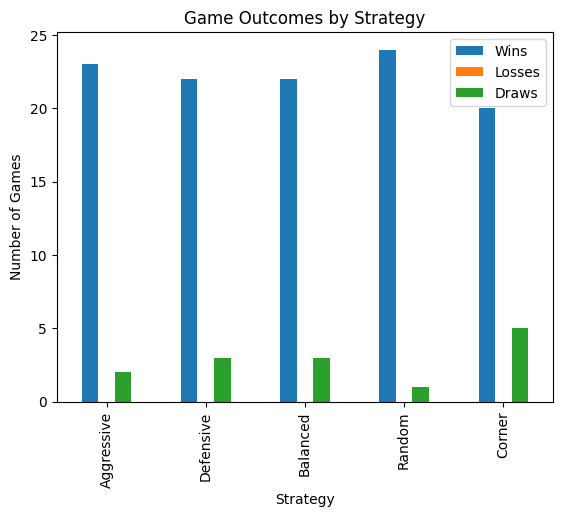

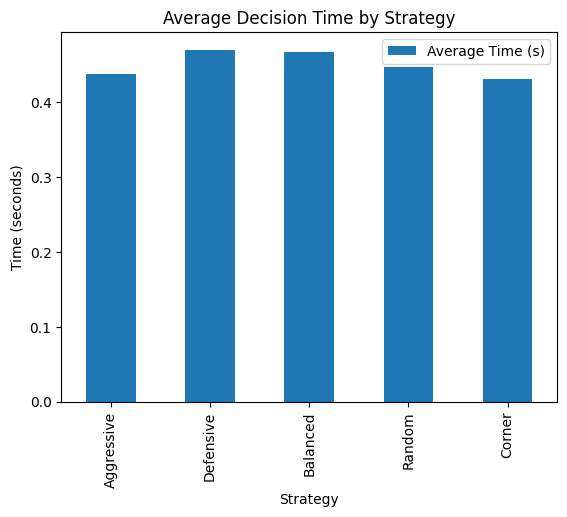

Playing the game...
 | | | 
-------
 | | | 
-------
 | | | 
-------
 | | | 
AI (X) makes a move at (0, 0)
X| | | 
-------
 | | | 
-------
 | | | 
-------
 | | | 
X| |O| 
-------
 | | | 
-------
 | | | 
-------
 | | | 
AI (X) makes a move at (0, 3)
X| |O|X
-------
 | | | 
-------
 | | | 
-------
 | | | 
Invalid move. Try again.
X| |O|X
-------
 | | | 
-------
 | |O| 
-------
 | | | 
AI (X) makes a move at (3, 3)
X| |O|X
-------
 | | | 
-------
 | |O| 
-------
 | | |X
X| |O|X
-------
 | | | 
-------
 |O|O| 
-------
 | | |X
AI (X) makes a move at (3, 0)
X| |O|X
-------
 | | | 
-------
 |O|O| 
-------
X| | |X
X| |O|X
-------
 | | | 
-------
 |O|O|O
-------
X| | |X
AI (X) makes a move at (2, 0)
X| |O|X
-------
 | | | 
-------
X|O|O|O
-------
X| | |X
Invalid move. Try again.
X| |O|X
-------
 | | | 
-------
X|O|O|O
-------
X| |O|X
AI (X) makes a move at (1, 0)
X| |O|X
-------
X| | | 
-------
X|O|O|O
-------
X| |O|X
Player X wins!


In [8]:
# import libraries
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# Function to switch the current player between PLAYER_X and PLAYER_O
def switch_player(player):
    return PLAYER_O if player == PLAYER_X else PLAYER_X

# Function to get the available actions (empty spots on the board)
def get_available_actions(board):
    actions = []
    for row in range(len(board)):
        for col in range(len(board)):
            if board[row][col] == EMPTY:
                actions.append((row, col))
    return actions

# Function to update the board state after a player makes a move
def get_next_state(board, move, player):
    row, col = move
    next_board = [row[:] for row in board]
    next_board[row][col] = player
    return next_board

# Function defining an aggressive strategy for AI player
def aggressive_strategy(board, ai_player):
    valid_moves = get_available_actions(board)
    best_move = None
    max_threats = 0
    
    # Evaluate each possible move for its potential to increase threats against the opponent
    for move in valid_moves:
        new_board = get_next_state(board, move, switch_player(ai_player))
        threats = count_winning_threats(new_board, switch_player(ai_player))
        if threats > max_threats:
            max_threats = threats
            best_move = move
    
    # Choose the move with the highest threat, or a random move if no threats are found
    if best_move is not None:
        return best_move
    else:
        return random.choice(valid_moves) if valid_moves else None

# Function defining a defensive strategy for AI player
def defensive_strategy(board, ai_player):
    valid_moves = get_available_actions(board)
    best_move = None
    max_blocks = 0
    
    # Evaluate each move for its potential to block opponent's winning opportunities
    for move in valid_moves:
        new_board = get_next_state(board, move, ai_player)
        blocks = count_blocking_opportunities(new_board, ai_player)
        if blocks > max_blocks:
            max_blocks = blocks
            best_move = move
    
    # Choose the move with the most blocks, or a random move if no blocks are found
    if best_move is not None:
        return best_move
    else:
        return random.choice(valid_moves) if valid_moves else None

# Function defining a balanced strategy for AI player
def balanced_strategy(board, ai_player):
    aggressive_move = aggressive_strategy(board, ai_player)
    defensive_move = defensive_strategy(board, ai_player)
    
    # Choose randomly between the best aggressive and defensive moves
    if aggressive_move is not None and defensive_move is not None:
        return random.choice([aggressive_move, defensive_move])
    elif aggressive_move is not None:
        return aggressive_move
    elif defensive_move is not None:
        return defensive_move
    else:
        return random_strategy(board, ai_player)

# Function defining a random strategy for AI player
def random_strategy(board, ai_player):
    valid_moves = get_available_actions(board)
    return random.choice(valid_moves) if valid_moves else None

# Function defining a strategy that prioritizes corner moves
def corner_strategy(board, ai_player):
    size = len(board)
    corners = [(0, 0), (0, size - 1), (size - 1, 0), (size - 1, size - 1)]
    valid_corners = [move for move in corners if board[move[0]][move[1]] == EMPTY]
    if valid_corners:
        return random.choice(valid_corners)
    else:
        return random_strategy(board, ai_player)


# Function to count potential winning threats by checking rows, columns, diagonals
def count_winning_threats(board, player):
    size = len(board)
    threats = 0
    
    # Check each row, column, and diagonal for potential winning threats
    for row in range(size):
        if sum(1 for col in range(size) if board[row][col] == player) == size - 1:
            threats += 1
    for col in range(size):
        if sum(1 for row in range(size) if board[row][col] == player) == size - 1:
            threats += 1
    if sum(1 for i in range(size) if board[i][i] == player) == size - 1:
        threats += 1
    if sum(1 for i in range(size) if board[i][size-1-i] == player) == size - 1:
        threats += 1
    
    return threats

# Function to count potential blocking opportunities by checking rows, columns, diagonals
def count_blocking_opportunities(board, player):
    opponent = switch_player(player)
    size = len(board)
    blocks = 0
    
    # Check rows
    for row in range(size):
        if sum(1 for col in range(size) if board[row][col] == opponent) == size - 2:
            blocks += 1
    
    # Check columns
    for col in range(size):
        if sum(1 for row in range(size) if board[row][col] == opponent) == size - 2:
            blocks += 1
    
    # Check main diagonal
    if sum(1 for i in range(size) if board[i][i] == opponent) == size - 2:
        blocks += 1
    
    # Check anti-diagonal
    if sum(1 for i in range(size) if board[i][size-1-i] == opponent) == size - 2:
        blocks += 1
    
    return blocks

def play_game_with_strategy(strategy, ai_player, depth_limit):
    # Start the timer to measure the duration of the game
    start_time = time.time()
    # Initialize the game board with a predefined size
    board = create_board(4)
    # Set the starting player
    current_player = PLAYER_X
    
    # Continue playing as long as the board has empty spaces and no player has won
    while not is_board_full(board) and not has_won(board, PLAYER_X) and not has_won(board, PLAYER_O):
        # Choose the move based on the current player
        if current_player == ai_player:
            # If the current player is the AI, find the best move using a decision-making algorithm
            move = get_best_move(board, current_player, depth_limit)
        else:
            # If the current player is not the AI, use the strategy function provided
            move = strategy(board, ai_player)
        
        # If no valid move is found, end the game
        if move is None:
            break
        
        # Execute the chosen move on the board
        row, col = move
        board[row][col] = current_player
        
        # Check if the current move has resulted in a win
        if has_won(board, current_player):
            # Calculate the elapsed time since the start
            elapsed_time = time.time() - start_time
            # Return the winner and the time taken to reach the win
            return current_player, elapsed_time
        
        # Switch players for the next turn
        current_player = switch_player(current_player)
    
    # Calculate the total game duration if it ends in a draw
    elapsed_time = time.time() - start_time
    # Return 'Draw' and the time taken for the game
    return "Draw", elapsed_time


def run_simulations(num_simulations, depth_limit):
    # Define the strategies available with corresponding functions
    strategies = {
        "Aggressive": aggressive_strategy,
        "Defensive": defensive_strategy,
        "Balanced": balanced_strategy,
        "Random": random_strategy,
        "Corner": corner_strategy
    }
    
    # Initialize a dictionary to keep track of game outcomes and durations for each strategy
    results = {name: {"Wins": 0, "Losses": 0, "Draws": 0, "Times": []} for name in strategies}
    # Set the AI player
    ai_player = PLAYER_X
    
    # Run the game for each strategy the given number of times
    for name, strategy in strategies.items():
        for _ in range(num_simulations):
            # Execute a single game simulation
            result, time_taken = play_game_with_strategy(strategy, ai_player, depth_limit)
            # Update results based on the outcome of the game
            if result == ai_player:
                results[name]["Wins"] += 1
            elif result == "Draw":
                results[name]["Draws"] += 1
            else:
                results[name]["Losses"] += 1
            # Record the time taken for each game
            results[name]["Times"].append(time_taken)
    
    # Prepare the data for summarization
    data = {
        "Strategy": [],
        "Wins": [],
        "Losses": [],
        "Draws": [],
        "Average Time (s)": []
    }
    
    # Populate the summary data structure from the results
    for name, stats in results.items():
        data["Strategy"].append(name)
        data["Wins"].append(stats["Wins"])
        data["Losses"].append(stats["Losses"])
        data["Draws"].append(stats["Draws"])
        data["Average Time (s)"].append(sum(stats["Times"]) / len(stats["Times"]))
    
    # Create a DataFrame from the collected data
    df = pd.DataFrame(data)
    # Return the DataFrame for further analysis or visualization
    return df

def plot_results(df):
    # Bar plot for wins, losses, and draws
    df.plot(x="Strategy", y=["Wins", "Losses", "Draws"], kind="bar")
    plt.title("Game Outcomes by Strategy")
    plt.ylabel("Number of Games")
    plt.show()
    
    # Bar plot for average decision time
    df.plot(x="Strategy", y="Average Time (s)", kind="bar")
    plt.title("Average Decision Time by Strategy")
    plt.ylabel("Time (seconds)")
    plt.show()

def main():
    board_size = 4
    depth_limit = 4
    num_simulations = 25
    
    print("Running simulations against different strategies...")
    df = run_simulations(num_simulations, depth_limit)
    
    print("Simulation results:")
    print(df)
    
    plot_results(df)
    
    print("Playing the game...")
    play_game(board_size)

if __name__ == "__main__":
    main()

# Plots to visualise the performance 

## 3.2: Analysis of Steps Per Move

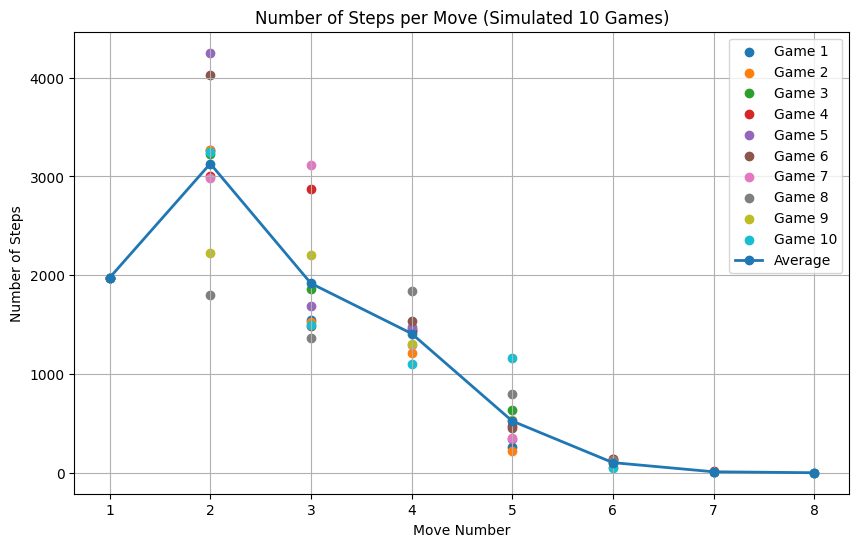

In [9]:
import matplotlib.pyplot as plt

def count_steps_per_move(board, player, depth_limit):
    # Initialize a list to keep track of the number of steps (nodes evaluated) for each move made by the specified player
    steps_per_move = []
    # Start with the specified player as the current player
    current_player = player
    
    # Continue the game as long as the board has open spots and no player has won
    while not is_board_full(board) and not has_won(board, PLAYER_X) and not has_won(board, PLAYER_O):
        # Check if it's the turn of the player we are tracking
        if current_player == player:
            # Initialize steps counter for this move
            steps = 0
            # Execute the minimax algorithm with alpha-beta pruning to find the best move and count the steps
            _, steps = minimax_with_depth_and_steps(board, depth_limit, -math.inf, math.inf, True, player, None, depth_limit)
            # Append the number of steps taken by the minimax algorithm for the current move to the list
            steps_per_move.append(steps)
            # Get the best move as determined by minimax
            move = get_best_move(board, current_player, depth_limit)
            # Update the board with the move
            row, col = move
            board[row][col] = current_player
        else:
            # If it's not the player we are tracking, use a random strategy for the opponent
            move = random_strategy(board, current_player)
            # If no valid move is found, break the loop, ending the game
            if move is None:
                break
            # Execute the random move
            row, col = move
            board[row][col] = current_player
        
        # Check if the current move led to a win, if so, exit the loop
        if has_won(board, current_player):
            break
        
        # Switch to the other player for the next turn
        current_player = switch_player(current_player)
    
    # Return the list of steps per move for the player we are tracking
    return steps_per_move


def minimax_with_depth_and_steps(board, depth, alpha, beta, maximizing_player, player, last_move, depth_limit):
    # Base condition: stop if the maximum depth is reached, any player has won, or the board is full
    if depth == 0 or has_won(board, PLAYER_X) or has_won(board, PLAYER_O) or is_board_full(board):
        return evaluate_board(board, player, last_move), 1  # Return the evaluation score and count one step

    steps = 0  # Initialize step counter for this recursive depth
    
    if maximizing_player:
        max_eval = -math.inf  # Initialize the maximum evaluation score to negative infinity
        best_move = None  # Initialize the best move to None
        # Iterate through each cell in the board
        for row in range(len(board)):
            for col in range(len(board)):
                # Check if the current cell is a valid move
                if is_valid_move(board, row, col):
                    board[row][col] = player  # Make the move for the maximizing player
                    # Recursively call the minimax function, decreasing depth by 1 and switching to minimizing player
                    eval, sub_steps = minimax_with_depth_and_steps(board, depth - 1, alpha, beta, False, player, (row, col), depth_limit)
                    board[row][col] = EMPTY  # Undo the move
                    steps += sub_steps  # Accumulate the number of steps from the subtree
                    # If the returned evaluation is greater than the current maximum, update max_eval and best_move
                    if eval > max_eval:
                        max_eval = eval
                        best_move = (row, col)
                    # Update the alpha value, which is the best value that the maximizer can guarantee at that level or above
                    alpha = max(alpha, eval)
                    # Alpha-Beta Pruning: if alpha is greater than or equal to beta, cut off further exploration
                    if beta <= alpha:
                        break
        # If the current depth is the initial call (depth limit reached), return the best move and steps
        if depth == depth_limit:
            return best_move, steps
        else:
            return max_eval, steps  # Otherwise, return the best evaluation and steps
    else:
        min_eval = math.inf  # Initialize the minimum evaluation score to positive infinity
        best_move = None  # Initialize the best move to None
        opponent = PLAYER_O if player == PLAYER_X else PLAYER_X  # Determine the opponent based on the current player
        # Iterate through each cell in the board
        for row in range(len(board)):
            for col in range(len(board)):
                # Check if the current cell is a valid move for the opponent
                if is_valid_move(board, row, col):
                    board[row][col] = opponent  # Make the move for the minimizing player
                    # Recursively call the minimax function, decreasing depth by 1 and switching to maximizing player
                    eval, sub_steps = minimax_with_depth_and_steps(board, depth - 1, alpha, beta, True, player, (row, col), depth_limit)
                    board[row][col] = EMPTY  # Undo the move
                    steps += sub_steps  # Accumulate the number of steps from the subtree
                    # If the returned evaluation is less than the current minimum, update min_eval and best_move
                    if eval < min_eval:
                        min_eval = eval
                        best_move = (row, col)
                    # Update the beta value, which is the best value that the minimizer can guarantee at that level or below
                    beta = min(beta, eval)
                    # Alpha-Beta Pruning: if beta is less than or equal to alpha, cut off further exploration
                    if beta <= alpha:
                        break
        # If the current depth is the initial call (depth limit reached), return the best move and steps
        if depth == depth_limit:
            return best_move, steps
        else:
            return min_eval, steps  # Otherwise, return the best evaluation and steps

def plot_average_steps_per_move(all_steps_per_move):
    num_games = len(all_steps_per_move)
    max_moves = max(len(steps) for steps in all_steps_per_move)
    
    plt.figure(figsize=(10, 6))
    
    # Plot scatter points for each game
    for i, steps_per_move in enumerate(all_steps_per_move, start=1):
        moves = range(1, len(steps_per_move) + 1)
        plt.scatter(moves, steps_per_move, marker='o', label=f'Game {i}')
    
    # Calculate and plot average steps per move
    average_steps = []
    for move_number in range(1, max_moves + 1):
        total_steps = sum(steps[move_number - 1] for steps in all_steps_per_move if len(steps) >= move_number)
        num_games_with_move = sum(1 for steps in all_steps_per_move if len(steps) >= move_number)
        average_steps.append(total_steps / num_games_with_move)
    
    plt.plot(range(1, max_moves + 1), average_steps, marker='o', linewidth=2, label='Average')
    
    plt.xlabel('Move Number')
    plt.ylabel('Number of Steps')
    plt.title(f'Number of Steps per Move (Simulated {num_games} Games)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Usage example
board_size = 4
depth_limit = 4
ai_player = PLAYER_X
num_simulations = 10

all_steps_per_move = []
for _ in range(num_simulations):
    board = create_board(board_size)
    steps_per_move = count_steps_per_move(board, ai_player, depth_limit)
    all_steps_per_move.append(steps_per_move)

plot_average_steps_per_move(all_steps_per_move)

## 3.3: Time VS Depth Analysis

Running depth vs. time test...
Depth: 1, Best Move: (0, 0), Time: 0.00116 seconds
Depth: 2, Best Move: (0, 0), Time: 0.00932 seconds
Depth: 3, Best Move: (0, 0), Time: 0.02941 seconds
Depth: 4, Best Move: (0, 0), Time: 0.13552 seconds
Depth: 5, Best Move: (0, 0), Time: 0.47860 seconds
Depth: 6, Best Move: (0, 0), Time: 2.25004 seconds


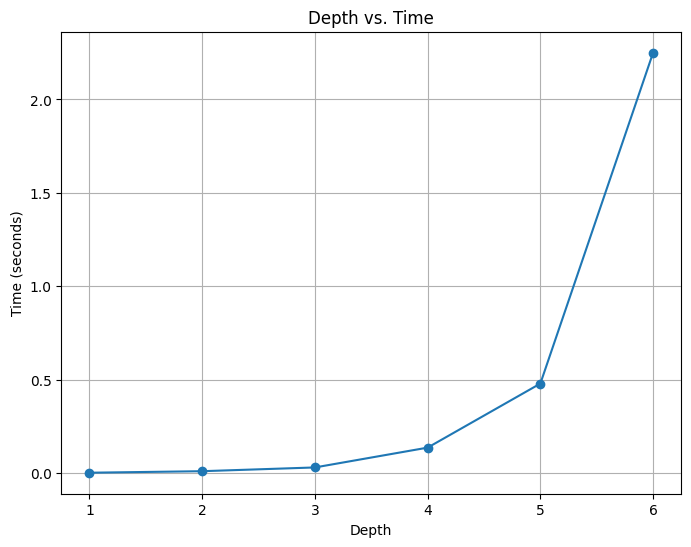

Starting the game...
 | | | 
-------
 | | | 
-------
 | | | 
-------
 | | | 
AI (X) makes a move at (0, 0)
X| | | 
-------
 | | | 
-------
 | | | 
-------
 | | | 
Invalid input. Try again.
Invalid input. Try again.
Invalid input. Try again.
Invalid move. Try again.
X| |O| 
-------
 | | | 
-------
 | | | 
-------
 | | | 
AI (X) makes a move at (0, 3)
X| |O|X
-------
 | | | 
-------
 | | | 
-------
 | | | 
Invalid move. Try again.
X| |O|X
-------
 | | | 
-------
 | | | 
-------
 | | |O
AI (X) makes a move at (2, 2)
X| |O|X
-------
 | | | 
-------
 | |X| 
-------
 | | |O
X| |O|X
-------
 | | | 
-------
 | |X| 
-------
 | |O|O
AI (X) makes a move at (1, 2)
X| |O|X
-------
 | |X| 
-------
 | |X| 
-------
 | |O|O
X| |O|X
-------
 | |X| 
-------
 | |X| 
-------
 |O|O|O
AI (X) makes a move at (3, 0)
X| |O|X
-------
 | |X| 
-------
 | |X| 
-------
X|O|O|O
Invalid move. Try again.
X| |O|X
-------
 | |X| 
-------
 |O|X| 
-------
X|O|O|O
AI (X) makes a move at (1, 0)
X| |O|X
-------
X| |X| 
------

In [10]:
import math
import random
import time
import matplotlib.pyplot as plt

def test_depth_vs_time():
    board = create_board(4)  # Create a 4x4 game board
    player = PLAYER_X  # Assign the 'X' player for testing
    depth_values = range(1, 7)  # Create a range of depth values from 1 to 6 to test
    times = []  # Initialize a list to store the time taken for each depth level

    for depth in depth_values:
        start_time = time.time()  # Record the current time before computing the best move
        best_move = get_best_move(board, player, depth)  # Compute the best move using the minimax algorithm at the current depth
        end_time = time.time()  # Record the current time after computing the best move
        elapsed_time = end_time - start_time  # Calculate the elapsed time for the computation
        times.append(elapsed_time)  # Append the elapsed time to the times list
        print(f"Depth: {depth}, Best Move: {best_move}, Time: {elapsed_time:.5f} seconds")  # Print the depth, best move, and time taken

    # Plot the results
    plt.figure(figsize=(8, 6))  # Create a new figure for plotting with specified size
    plt.plot(depth_values, times, marker='o')  # Plot the depth values against the times with circle markers
    plt.xlabel('Depth')  # Set the x-axis label to 'Depth'
    plt.ylabel('Time (seconds)')  # Set the y-axis label to 'Time (seconds)'
    plt.title('Depth vs. Time')  # Set the title of the plot
    plt.grid(True)  # Enable the grid for better readability of the plot
    plt.show()  # Display the plot

# Main function to start the game and run tests
def main():
    board_size = 4
    print("Running depth vs. time test...")
    test_depth_vs_time()
    
    print("Starting the game...")
    play_game(board_size)

# Entry point of the program
if __name__ == "__main__":
    main()